In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import plotly.express as px

In [2]:
df = pd.read_csv("spotify_top_1000_tracks.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_name    1000 non-null   object 
 1   artist        1000 non-null   object 
 2   album         1000 non-null   object 
 3   release_date  1000 non-null   object 
 4   popularity    1000 non-null   int64  
 5   spotify_url   1000 non-null   object 
 6   id            1000 non-null   object 
 7   duration_min  1000 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


,popularity,duration_min
count,1000.000000,1000.000000
mean,56.669000,3.318516
std,28.192805,0.849591
min,0.000000,0.969150
25%,37.000000,2.754021
50%,68.000000,3.293833
75%,79.000000,3.745721
max,97.000000,9.497883


In [12]:
print("Original column names:\n", df.columns.tolist())
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w\s]', '', regex=True)
print("\nCleaned column names:\n", df.columns.tolist())

Original column names:
 ['track_name', 'artist', 'album', 'release_date', 'popularity', 'spotify_url', 'id', 'duration_min']

Cleaned column names:
 ['track_name', 'artist', 'album', 'release_date', 'popularity', 'spotify_url', 'id', 'duration_min']


<Axes: xlabel='artist', ylabel='Count'>

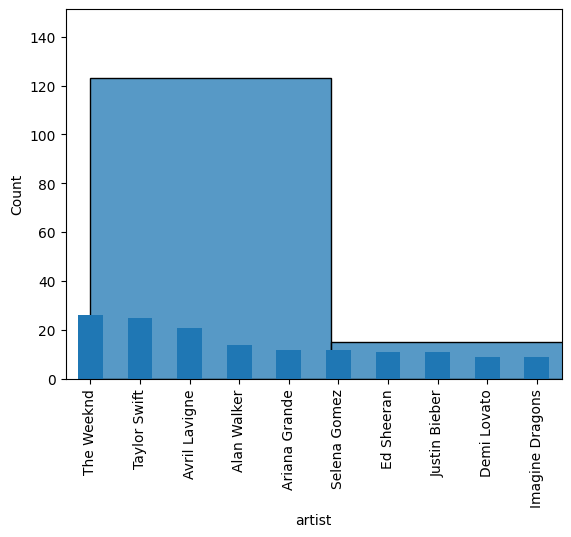

In [13]:
sns.histplot(df['popularity'], bins=20)
df['artist'].value_counts().head(10).plot(kind='bar')

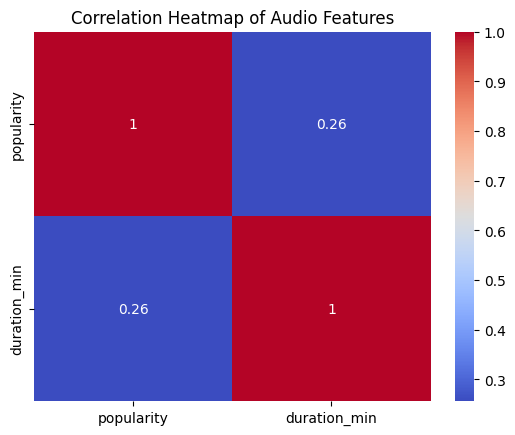

In [29]:
numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Audio Features")
plt.show()

In [30]:
df.to_csv("spotify_analysis_output.csv", index=False)